In [1]:
%matplotlib notebook

import os
import subprocess
import gzip
import time

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import skimage.segmentation
import scipy.ndimage as ndimage
import scipy.signal as signal

import numpy as np
import nibabel as nib

/afs/csail.mit.edu/u/n/nmsingh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
scannumber = 'C401-031615'
filename = scannumber+'_0000.nii.gz'
data_path = os.path.join('/data/vision/polina/projects/fetal_data/data/haste/Singleton-Control',scannumber,filename)
img = nib.load(data_path).get_data()
sl = img[:,:,int(img.shape[2]/2)]

In [3]:
def add_horiz_translation(sl,num_pix,k_line):
    sl_slide = ndimage.interpolation.shift(sl,[0,num_pix])
    sl_k = np.fft.fft2(sl)
    sl_k_slide = np.fft.fft2(sl_slide)
    sl_k_combined = sl_k
    sl_k_combined[:,:k_line] = sl_k_slide[:,:k_line]
    sl_motion = np.fft.ifft2(sl_k_combined)
    return sl_slide, sl_motion

def plot_horiz_trans(img):
    fig,axes = plt.subplots( 4,4, figsize=[12,12] )
    numpixs = [0,1,3,10]
    klines = [0,15,30,60]
    for i,iax in enumerate( axes.flatten() ):
        r = i%4
        c = int((i-r)/4)
        this_img = add_horiz_translation(img,numpixs[r],klines[c])[1]
        iax.imshow(np.real(this_img),cmap='gray', interpolation='nearest')
        iax.set_yticks([])
        iax.set_xticks([])
        if(r==0):
            iax.set_ylabel('k-space boundary: '+str(klines[c]))
        if(c==3):
            iax.set_xlabel(str(numpixs[r])+'-px translation')
    fig.show()

In [4]:
plot_horiz_trans(sl)

<IPython.core.display.Javascript object>

In [5]:
def add_rotation(sl,angle,k_line):
    sl_rotate = ndimage.rotate(sl, angle, reshape=False)
    sl_k = np.fft.fft2(sl)
    sl_k_rotate = np.fft.fft2(sl_rotate)
    sl_k_combined = sl_k
    sl_k_combined[:,:k_line] = sl_k_rotate[:,:k_line]
    sl_motion = np.fft.ifft2(sl_k_combined)
    return sl_rotate, sl_motion

def plot_rotation(img):
    fig,axes = plt.subplots( 4,4, figsize=[12,12] )
    numdegs = [0,5,10,20]
    klines = [0,15,30,60]
    for i,iax in enumerate( axes.flatten() ):
        r = i%4
        c = int((i-r)/4)
        this_img = add_rotation(img,numdegs[r],klines[c])[1]
        iax.imshow(np.real(this_img),cmap='gray', interpolation='nearest')
        iax.set_yticks([])
        iax.set_xticks([])
        if(r==0):
            iax.set_ylabel('k-space boundary: '+str(klines[c]))
        if(c==3):
            iax.set_xlabel(str(numdegs[r])+'degree rotation')
    fig.show()

<IPython.core.display.Javascript object>


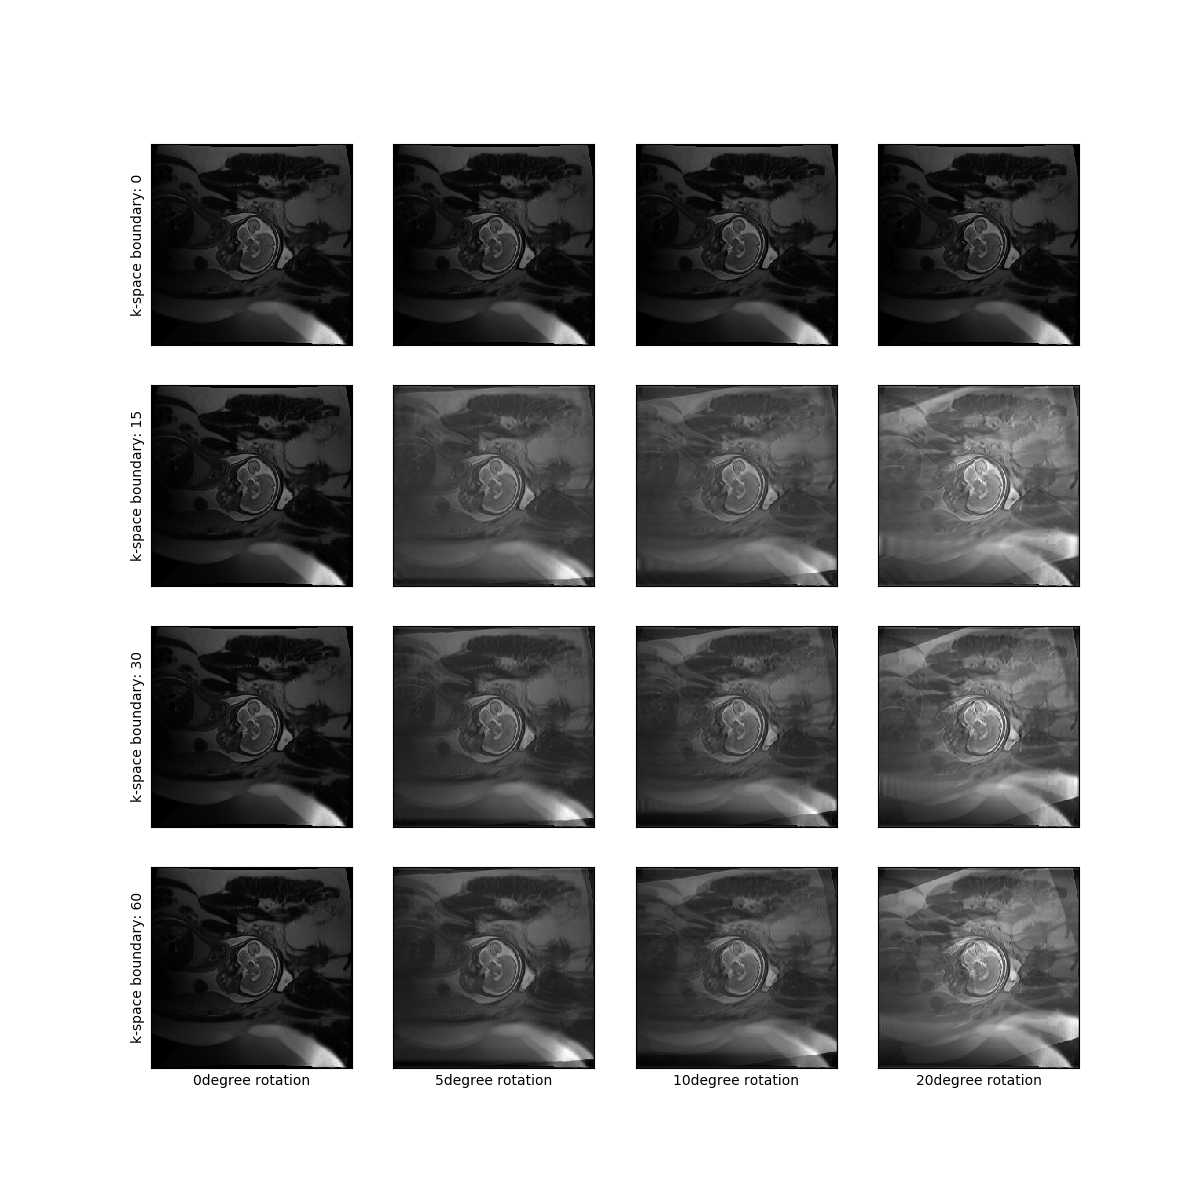

In [6]:
plot_rotation(sl)

In [7]:
#oop = out of plane
def add_oop_horiz_translation(img,num_pix,k_line):
    img_slide = ndimage.interpolation.shift(img,[0,0,num_pix])
    sl = img[:,:,int(img.shape[2]/2)]
    sl_slide = img_slide[:,:,int(img.shape[2]/2)]
    sl_k = np.fft.fft2(sl)
    sl_k_slide = np.fft.fft2(sl_slide)
    sl_k_combined = sl_k
    sl_k_combined[:,:k_line] = sl_k_slide[:,:k_line]
    sl_motion = np.fft.ifft2(sl_k_combined)
    return sl_slide, sl_motion

def plot_oop_horiz_trans(img):
    fig,axes = plt.subplots( 4,4, figsize=[12,12] )
    numpixs = [0,1,5,20]
    klines = [0,15,30,60]
    for i,iax in enumerate( axes.flatten() ):
        r = i%4
        c = int((i-r)/4)
        this_img = add_oop_horiz_translation(img,numpixs[r],klines[c])[1]
        iax.imshow(np.real(this_img),cmap='gray', interpolation='nearest')
        iax.set_yticks([])
        iax.set_xticks([])
        if(r==0):
            iax.set_ylabel('k-space boundary: '+str(klines[c]))
        if(c==3):
            iax.set_xlabel(str(numpixs[r])+'-px translation')
    fig.show()

<IPython.core.display.Javascript object>


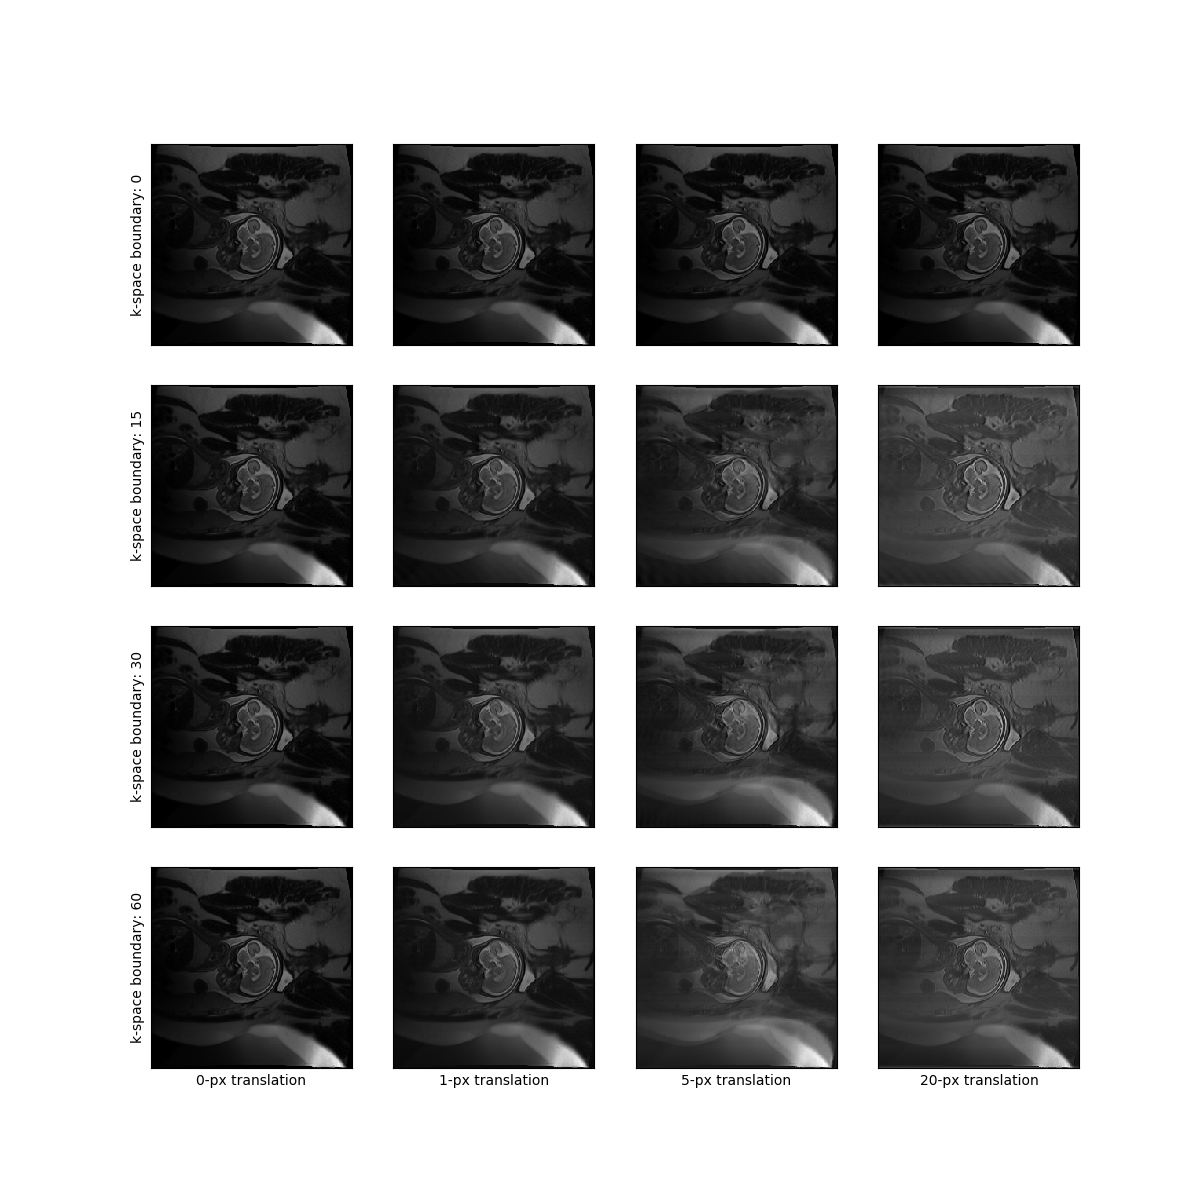

In [8]:
plot_oop_horiz_trans(img)